In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [64]:
fraud_df = pd.read_csv('../data/fraud.csv')

# check information

In [65]:
pd.set_option('display.max_columns', None)

In [66]:
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [67]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [68]:
fraud_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [69]:
fraud_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

<AxesSubplot:xlabel='city_pop', ylabel='is_fraud'>

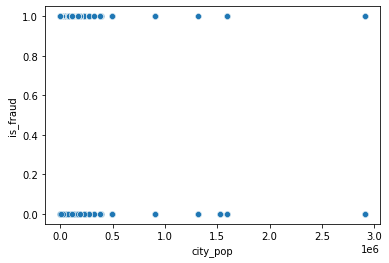

In [70]:
sns.scatterplot(x=fraud_df['city_pop'], y=fraud_df['is_fraud'])

- 딱히 사기거래가 인구 수에 영향을 받는거 같지는 않음 city_pop drop

In [71]:
fraud_df = fraud_df.drop(['cc_num','unix_time', 'trans_num','first','last','street','zip', 'job', 'city_pop'], axis=1)

In [72]:
fraud_df[['trans_date_trans_time', 'dob']] = fraud_df[['trans_date_trans_time', 'dob']].apply(pd.to_datetime)

In [73]:
fraud_df['trans_date'] = fraud_df['trans_date_trans_time'].dt.date
fraud_df['trans_time'] = fraud_df['trans_date_trans_time'].dt.time

In [112]:
fraud_df['trans_time'] = pd.to_datetime(fraud_df['trans_time'], format='%H:%M:%S').dt.time

In [114]:
fraud_df['trans_df'] = pd.to_datetime(fraud_df['trans_date'])

In [75]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   merchant               491134 non-null  object        
 2   category               491134 non-null  object        
 3   amt                    491134 non-null  float64       
 4   gender                 491134 non-null  object        
 5   city                   491134 non-null  object        
 6   state                  491134 non-null  object        
 7   lat                    491134 non-null  float64       
 8   long                   491134 non-null  float64       
 9   dob                    491134 non-null  datetime64[ns]
 10  merch_lat              491134 non-null  float64       
 11  merch_long             491134 non-null  float64       
 12  is_fraud               491134 non-null  int6

In [76]:
fraud_df['location'] = fraud_df['state']+ ' ' + fraud_df['city']

In [77]:
fraud_df.drop(['state', 'city', 'trans_date_trans_time'],axis=1, inplace=True)

In [78]:
fraud_df

,merchant,category,amt,gender,lat,long,dob,merch_lat,merch_long,is_fraud,trans_date,trans_time,location
0,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0,2019-01-01,00:00:44,WA Orient
1,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0,2019-01-01,00:12:34,NJ Elizabeth
2,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0,2019-01-01,00:17:16,NJ Plainfield
3,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0,2019-01-01,00:20:15,MI Romulus
4,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0,2019-01-01,00:23:41,LA Baton Rouge
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,1983-02-08,34.853497,-78.664158,0,2020-12-31,23:56:48,NC Wilmington
491130,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1984-06-03,35.008839,-81.475156,0,2020-12-31,23:56:57,SC Bradley
491131,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,1999-12-27,29.661049,-96.186633,0,2020-12-31,23:59:09,TX Lake Jackson
491132,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,1981-11-29,46.658340,-119.715054,0,2020-12-31,23:59:15,WA Burbank


In [79]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   merchant    491134 non-null  object        
 1   category    491134 non-null  object        
 2   amt         491134 non-null  float64       
 3   gender      491134 non-null  object        
 4   lat         491134 non-null  float64       
 5   long        491134 non-null  float64       
 6   dob         491134 non-null  datetime64[ns]
 7   merch_lat   491134 non-null  float64       
 8   merch_long  491134 non-null  float64       
 9   is_fraud    491134 non-null  int64         
 10  trans_date  491134 non-null  object        
 11  trans_time  491134 non-null  object        
 12  location    491134 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 48.7+ MB


In [80]:
fraud_df['age'] = datetime.now().year - fraud_df['dob'].dt.year

In [81]:
fraud_df.drop('dob',axis=1,inplace=True)

In [82]:
fraud_df

,merchant,category,amt,gender,lat,long,merch_lat,merch_long,is_fraud,trans_date,trans_time,location,age
0,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,49.159047,-118.186462,0,2019-01-01,00:00:44,WA Orient,46
1,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,40.079588,-74.848087,0,2019-01-01,00:12:34,NJ Elizabeth,44
2,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,40.021888,-74.228188,0,2019-01-01,00:17:16,NJ Plainfield,50
3,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,42.360426,-83.552316,0,2019-01-01,00:20:15,MI Romulus,53
4,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,29.737426,-90.853194,0,2019-01-01,00:23:41,LA Baton Rouge,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,34.853497,-78.664158,0,2020-12-31,23:56:48,NC Wilmington,41
491130,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,35.008839,-81.475156,0,2020-12-31,23:56:57,SC Bradley,40
491131,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,29.661049,-96.186633,0,2020-12-31,23:59:09,TX Lake Jackson,25
491132,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,46.658340,-119.715054,0,2020-12-31,23:59:15,WA Burbank,43


- merchant 관련 df 따로 만들고 드랍하기 

In [83]:
m_fraud_df = fraud_df[['merchant', 'merch_lat','merch_long', 'location']]

In [84]:
m_fraud_df

,merchant,merch_lat,merch_long,location
0,"fraud_Heller, Gutmann and Zieme",49.159047,-118.186462,WA Orient
1,"fraud_Schultz, Simonis and Little",40.079588,-74.848087,NJ Elizabeth
2,fraud_Kling-Grant,40.021888,-74.228188,NJ Plainfield
3,fraud_Deckow-O'Conner,42.360426,-83.552316,MI Romulus
4,fraud_Balistreri-Nader,29.737426,-90.853194,LA Baton Rouge
...,...,...,...,...
491129,fraud_Botsford and Sons,34.853497,-78.664158,NC Wilmington
491130,"fraud_Baumbach, Hodkiewicz and Walsh",35.008839,-81.475156,SC Bradley
491131,fraud_Hoppe-Parisian,29.661049,-96.186633,TX Lake Jackson
491132,fraud_Rau-Robel,46.658340,-119.715054,WA Burbank


In [85]:
fraud_df = fraud_df.drop(fraud_df[['merchant', 'merch_lat','merch_long']],axis=1)

In [86]:
fraud_df.describe()

,amt,lat,long,is_fraud,age
count,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,69.050120,37.931230,-90.495619,0.002533,39.615769
std,160.322867,5.341193,12.990732,0.050264,9.297579
min,1.000000,24.655700,-122.345600,0.000000,20.000000
25%,8.960000,33.746700,-97.235100,0.000000,32.000000
50%,42.170000,38.507200,-87.591700,0.000000,40.000000
75%,80.330000,41.520500,-80.731000,0.000000,48.000000
max,25086.940000,48.887800,-69.965600,1.000000,54.000000


# check NULL & outlier

In [87]:
fraud_df.isnull().sum()

category      0
amt           0
gender        0
lat           0
long          0
is_fraud      0
trans_date    0
trans_time    0
location      0
age           0
dtype: int64

In [88]:
fraud_df.describe()

,amt,lat,long,is_fraud,age
count,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,69.050120,37.931230,-90.495619,0.002533,39.615769
std,160.322867,5.341193,12.990732,0.050264,9.297579
min,1.000000,24.655700,-122.345600,0.000000,20.000000
25%,8.960000,33.746700,-97.235100,0.000000,32.000000
50%,42.170000,38.507200,-87.591700,0.000000,40.000000
75%,80.330000,41.520500,-80.731000,0.000000,48.000000
max,25086.940000,48.887800,-69.965600,1.000000,54.000000


- amt.max()가 25086.94로 값이 너무 높음 확인해보기

In [89]:
fraud_df['amt'].sort_values(ascending=False).head(10)

93045     25086.94
49446     17897.24
410031    16837.08
198719    15047.03
43412     14630.68
352828    13149.15
341782    12176.55
271107    12025.30
480766    11586.34
472079    11052.59
Name: amt, dtype: float64

- travel로 amount가 25086.94 나온거는 너무 높음. 이상치인지 확인해보기

In [90]:
fraud_df['amt'].describe()

count    491134.000000
mean         69.050120
std         160.322867
min           1.000000
25%           8.960000
50%          42.170000
75%          80.330000
max       25086.940000
Name: amt, dtype: float64

In [91]:
q1 = 8.96
q3 = 80.33
IQR = q3-q1

In [92]:
q1-1.5*IQR

-98.095

In [93]:
(q3+1.5*IQR)*100

18738.5

- amt의 25086값은 이상치...그냥 제거하기

In [94]:
fraud_df = fraud_df.sort_values(by='amt', ascending=False).iloc[1:]

# check value

### age

In [95]:
def age_func(x):
    if 20 <= x < 30:
        return 20
    elif 30 <= x < 40:
        return 30
    elif 40 <= x < 50:
        return 40
    elif 50 <= x < 60:
        return 50
    elif 60 <= x < 70:
        return 60
    elif 70 <= x < 80:
        return 70
    elif 80 <= x < 90:
        return 80
    elif 90 <= x < 100:
        return 80
    else:
        return None

In [96]:
fraud_df['age'] = fraud_df['age'].apply(age_func)

### category

In [97]:
fraud_df['category'].unique()

array(['travel', 'shopping_net', 'shopping_pos', 'misc_net', 'misc_pos',
       'entertainment', 'food_dining', 'health_fitness', 'home',
       'personal_care', 'kids_pets', 'grocery_pos', 'grocery_net',
       'gas_transport'], dtype=object)

In [98]:
pos = []
net = []
others = []

for i in fraud_df['category']:
    if i.endswith('_pos'):
        pos.append(i)
    elif i.endswith('_net'):
        net.append(i)
    else:
        others.append(i)

In [99]:
pos_df = fraud_df[fraud_df['category'].isin(pos)].reset_index(drop=True)

In [100]:
net_df = fraud_df[fraud_df['category'].isin(net)].reset_index(drop=True)

In [101]:
others_df = fraud_df[~(fraud_df['category'].isin(net)) & ~(fraud_df['category'].isin(pos))].reset_index(drop=True)

- 변수 간 관계 파악
    - category 별 비교

In [102]:
fraud_df.groupby(['age','category'])['is_fraud'].mean().reset_index()

,age,category,is_fraud
0,20,entertainment,0.000463
1,20,food_dining,0.000113
2,20,gas_transport,0.003061
3,20,grocery_net,0.001019
4,20,grocery_pos,0.016848
5,20,health_fitness,0.000275
6,20,home,0.000754
7,20,kids_pets,0.000817
8,20,misc_net,0.005595
9,20,misc_pos,0.000715


In [103]:
fraud_df.groupby(['age','category'])['is_fraud'].sum().reset_index()

,age,category,is_fraud
0,20,entertainment,4
1,20,food_dining,1
2,20,gas_transport,38
3,20,grocery_net,5
4,20,grocery_pos,82
5,20,health_fitness,2
6,20,home,4
7,20,kids_pets,6
8,20,misc_net,34
9,20,misc_pos,5


- gas_transport, grocery_pos, misc_net, shopping_net, shopping_pos가 높게 나타남
- 시각화

<AxesSubplot:xlabel='category', ylabel='count'>

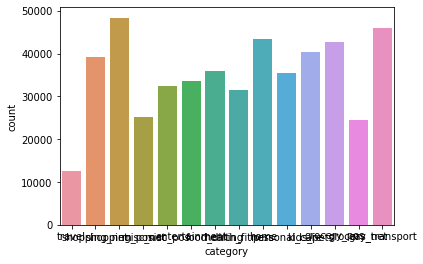

In [104]:
sns.countplot(x='category', data=fraud_df)

<AxesSubplot:xlabel='category', ylabel='is_fraud'>

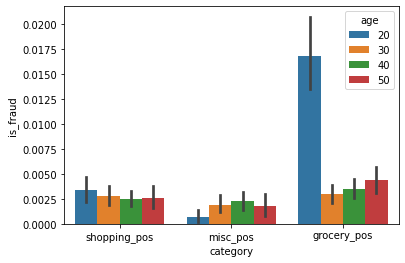

In [105]:
sns.barplot(x=pos_df['category'], y=pos_df['is_fraud'],hue=pos_df['age'])

<AxesSubplot:xlabel='category', ylabel='is_fraud'>

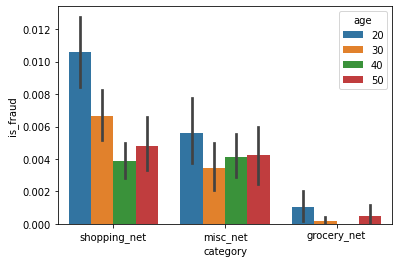

In [106]:
sns.barplot(x=net_df['category'], y=net_df['is_fraud'],hue=net_df['age'])

<AxesSubplot:xlabel='category', ylabel='is_fraud'>

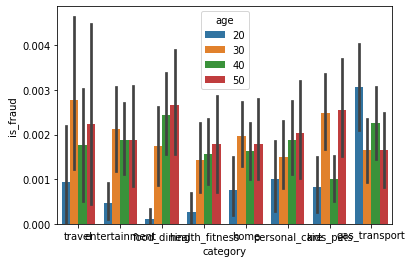

In [107]:
sns.barplot(x=others_df['category'], y=others_df['is_fraud'],hue=others_df['age'])

- amt랑 is_fraud 비교

<AxesSubplot:xlabel='amt', ylabel='is_fraud'>

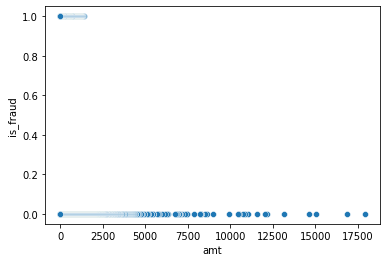

In [108]:
sns.scatterplot(x=fraud_df['amt'], y=fraud_df['is_fraud'])

- amt가 낮을 때 is_fraud가 많음 : 가격이 클수록 사기치기 어려움

In [111]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491133 entries, 49446 to 202844
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    491133 non-null  object 
 1   amt         491133 non-null  float64
 2   gender      491133 non-null  object 
 3   lat         491133 non-null  float64
 4   long        491133 non-null  float64
 5   is_fraud    491133 non-null  int64  
 6   trans_date  491133 non-null  object 
 7   trans_time  491133 non-null  object 
 8   location    491133 non-null  object 
 9   age         491133 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 57.3+ MB


TypeError: Invalid object type at position 0

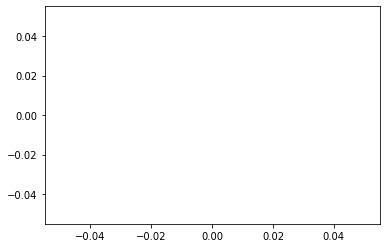

In [110]:
# sns.lineplot(x=fraud_df['trans_time'], y=fraud_df['is_fraud'])